In [2]:
# import required packages
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
# load dataset into dataframe
df = pd.read_csv('../data/data.csv')

# dataset shape: (rows, columns)
display(df.shape)

# first 5 datapoints
df.head()

(88647, 112)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
# describe the dataset
# statistical description of each feature
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [5]:
# null value counts
# no null values in any column
pd.DataFrame(np.asarray(df.isnull().sum()).reshape(-1, 112), columns=df.columns)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    58000
1    30647
Name: phishing, dtype: int64


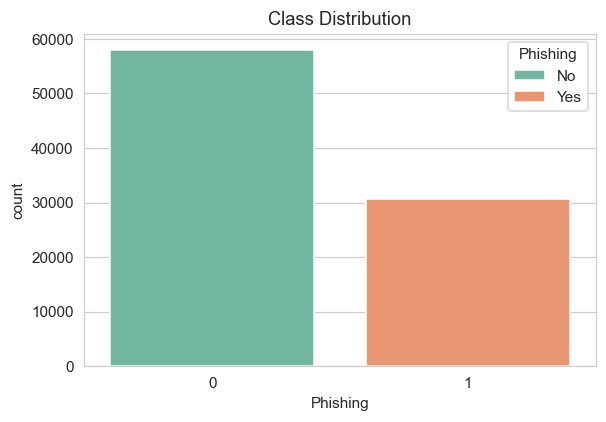

In [6]:
# class distribution
print(df['phishing'].value_counts())

# plot the class distribution
plt.figure(dpi=110)

chart = sns.countplot(x='phishing', data=df, hue='phishing', dodge=False, palette='Set2')

axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Phishing')
axes.legend(['No', 'Yes'], title='Phishing')

plt.show()

In [7]:
print("No of duplicate columns: ",df.duplicated(keep='first').sum())
#dropping duplicate rows
df.drop_duplicates(inplace=True)

No of duplicate columns:  1438


In [8]:
single_val_cols = []
print('Columns with single unique value: ')
for i in df.columns:
    if df[i].nunique()==1:
        print(f"{i} column has values {df[i].unique()[0]}")
        single_val_cols.append(i)
        
#These columns can be either dropped 
df.drop(single_val_cols,axis=1,inplace =True)

Columns with single unique value: 
qty_slash_domain column has values 0
qty_questionmark_domain column has values 0
qty_equal_domain column has values 0
qty_and_domain column has values 0
qty_exclamation_domain column has values 0
qty_space_domain column has values 0
qty_tilde_domain column has values 0
qty_comma_domain column has values 0
qty_plus_domain column has values 0
qty_asterisk_domain column has values 0
qty_hashtag_domain column has values 0
qty_dollar_domain column has values 0
qty_percent_domain column has values 0


In [9]:
cols1 = {} 
for i in df.columns:
    print("- - - - - - - - - - - - ")
    x=df[i].value_counts(normalize=True)
    print(x)
    if df[i].isin([-1]).any():
        cols1[i]=x[-1]

- - - - - - - - - - - - 
2     0.604559
1     0.178617
3     0.149549
4     0.041005
5     0.011524
6     0.005194
7     0.002465
14    0.001537
8     0.001193
15    0.000986
9     0.000722
10    0.000550
16    0.000505
13    0.000424
12    0.000378
11    0.000367
17    0.000252
18    0.000069
20    0.000034
22    0.000034
19    0.000011
23    0.000011
24    0.000011
Name: qty_dot_url, dtype: float64
- - - - - - - - - - - - 
0     0.823596
1     0.119231
2     0.027749
3     0.010332
4     0.005837
5     0.004013
6     0.002465
7     0.001777
8     0.001261
9     0.000860
10    0.000837
11    0.000608
12    0.000424
13    0.000287
14    0.000149
15    0.000115
17    0.000092
16    0.000057
21    0.000057
18    0.000046
19    0.000034
20    0.000034
23    0.000023
25    0.000023
26    0.000023
31    0.000023
24    0.000011
27    0.000011
34    0.000011
35    0.000011
Name: qty_hyphen_url, dtype: float64
- - - - - - - - - - - - 
0     0.939100
1     0.037794
2     0.011925
3     0.005401

In [10]:
#columns that have '-1'
df.columns[df.isin([-1]).any()]

# '-1' can be considered as a unique category
# -1 can be replaced with NAN and use KNN imputer or MissForest imputer to predict the missing value

Index(['qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_questionmark_directory',
       'qty_equal_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length',
       'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'qty_dot_params',
       'qty_hyphen_params', 'qty_underline_params', 'qty_slash_params',
       'qty_questionmark_params', 'qty_equal_params

In [11]:
# % of data in each column as '-1'
cols1

{'qty_dot_directory': 0.5311722413971035,
 'qty_hyphen_directory': 0.5311722413971035,
 'qty_underline_directory': 0.5311722413971035,
 'qty_slash_directory': 0.5311722413971035,
 'qty_questionmark_directory': 0.5311722413971035,
 'qty_equal_directory': 0.5311722413971035,
 'qty_at_directory': 0.5311722413971035,
 'qty_and_directory': 0.5311722413971035,
 'qty_exclamation_directory': 0.5311722413971035,
 'qty_space_directory': 0.5311722413971035,
 'qty_tilde_directory': 0.5311722413971035,
 'qty_comma_directory': 0.5311722413971035,
 'qty_plus_directory': 0.5311722413971035,
 'qty_asterisk_directory': 0.5311722413971035,
 'qty_hashtag_directory': 0.5311722413971035,
 'qty_dollar_directory': 0.5311722413971035,
 'qty_percent_directory': 0.5311722413971035,
 'directory_length': 0.5311722413971035,
 'qty_dot_file': 0.5311722413971035,
 'qty_hyphen_file': 0.5311722413971035,
 'qty_underline_file': 0.5311722413971035,
 'qty_slash_file': 0.5311722413971035,
 'qty_questionmark_file': 0.531172

In [12]:
#few columns have %91 of data as -1, dropping those columns
for i,j in cols1.items():
    if j>=0.9:
        df.drop(i,inplace=True,axis=1)

In [13]:
print(df.columns)
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']
domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']
dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory',
       'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']
file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length','phishing']
other_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip',
       'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory',
       'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory',

In [ ]:
df_imp=df.replace(to_replace = -1,value =np.nan)

import sklearn.neighbors._base
import sys

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

#applying KNN imputer
from sklearn.impute import KNNImputer
r=KNNImputer(n_neighbors=3)
df_kni=r.fit_transform(df_imp)
df_kni=pd.DataFrame(df_kni,columns=df_imp.columns)

#applying Rand Forest Imputer
from missingpy import MissForest
imputer = MissForest()
df_randforest = imputer.fit_transform(df_imp)
df_randforest=pd.DataFrame(df_randforest,columns=df_imp.columns)

In [ ]:
# Dataset attribute heatmap based on URL
plt.figure(figsize=(15,15))
sns.heatmap(df[url_cols].corr(),annot=True,linewidths="0.3",cmap="Blues")
plt.show()

In [ ]:
# Dataset attribute heatmap based on domain URL.
plt.figure(figsize=(10,10))
sns.heatmap(df[domain_cols].corr(), cmap="Blues",linewidth=0.3, cbar_kws={"shrink": .8},annot=True)
plt.show()

In [ ]:
# Dataset attribute heatmap based on URL directory.
plt.figure(figsize=(15,15))
sns.heatmap(df[dir_cols].corr(), cmap="Blues",linewidth=0.3, cbar_kws={"shrink": .8},annot=True)
plt.show()

In [ ]:
# Dataset attribute heatmap based on URL file name. 
plt.figure(figsize=(15,15))
sns.heatmap(df[file_cols].corr(), cmap="Blues",linewidth=0.3, cbar_kws={"shrink": .8},annot=True)
plt.show()

In [ ]:
# Dataset attribute heatmap based on URL parameters & Dataset attributes based on resolving URL and external services. 
plt.figure(figsize=(10,10))
sns.heatmap(df[other_cols].corr(), cmap="Blues",linewidth=0.3, cbar_kws={"shrink": .8},annot=True)
plt.show()